# Allegheny County Department of Human Services Data Challenge
Prasun Shrestha | 
November 6, 2020

In [21]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to see the raw code"></form>''')

#Code Source: Stack Overflow (https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer)

## Import packages and datasets

We will start the challenge with importing necessary Python packages and the dataset `AnalyticExcercise_20180214.xlsx`. Here is a snapshot of the dataframe:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [23]:
df = pd.read_excel("AnalyticExcercise_20180214.xlsx", sheet_name = 1)
df.columns = map(str.lower, df.columns) # lower case all the header

print("The dataframe has %d features and %d columns." % (df.shape[0], df.shape[1]))
df.head()

The dataframe has 2849 features and 36 columns.


,id,st_cntyname,gender,hispanic,ethnic,ethnic2,age_20161231,agecat7,spellage,inyear,...,durmo,durcat,recat,exit,im,iy,iymo,om,oy,oymo
0,3000901899,PA_Allegheny,F,U,WH,WH,20,7,17,2014,...,3.836066,3,6,XRF,1,2014,201401,4,2014,201404
1,3002061648,PA_Allegheny,M,U,BL,BL,7,3,4,2014,...,1.967213,2,6,XRF,1,2014,201401,3,2014,201403
2,3002306442,PA_Allegheny,M,N,WH,WH,3,1,0,2014,...,1.737705,2,1,XRF,1,2014,201401,2,2014,201402
3,3002012787,PA_Allegheny,M,N,BL,BL,6,3,4,2014,...,30.786885,6,3,XLC,1,2014,201401,8,2016,201608
4,3002035176,PA_Allegheny,F,N,BL,BL,5,2,2,2014,...,30.786885,6,3,XLC,1,2014,201401,8,2016,201608


## Data Cleaning

Before we do any exploratory data analysis, let's check if we have any missing values.

In [24]:
# checking for null values

nullValues = df.columns[df.isnull().any()] # checks for indexes with null values
print(df[nullValues].isnull().sum()) # counts the missing values for each series (features)

Series([], dtype: float64)


No counts of missing values exists. Thus, we do not have any missing values on the dataframe. \
As a result, we do not have to worry about removing missing values or imputations for the given dataframe.

## Exploratory Data Analysis

### Gender

The dataframe has a slightly higher count of `males`over `females`. Following are the frequency table and the histogram of relative frequency of genders.

In [25]:
df['gender'].value_counts()

M    1454
F    1395
Name: gender, dtype: int64

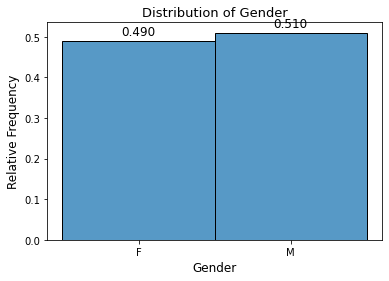

In [26]:
genderPlot = sns.histplot(df['gender'], stat = "probability")

genderPlot.set_xlabel("Gender", size = 12, color = "black")
genderPlot.set_ylabel("Relative Frequency", size = 12, color = "black");
genderPlot.set_title("Distribution of Gender", size = 13, loc = 'center', color = "black");

for p in genderPlot.patches:
    genderPlot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size = 12, color = "black",
                   textcoords = 'offset points')

plt.show()

### Hispanic

As with the `gender` variable, we explore the `hispanic` variable as well. An overwhelming majority of the observations are non-hispanics, and the difference in proportions is statistically significant.

In [27]:
df['hispanic'].value_counts()

N    2105
U     650
Y      94
Name: hispanic, dtype: int64

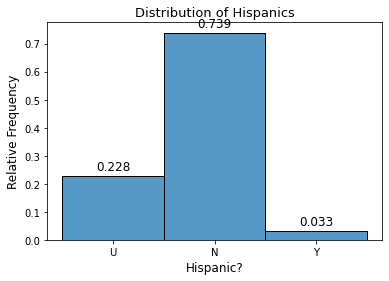

In [28]:
hispanicPlot = sns.histplot(df['hispanic'], stat = "probability")

hispanicPlot.set_xlabel("Hispanic?", size = 12, color = "black")
hispanicPlot.set_ylabel("Relative Frequency", size = 12, color = "black");
hispanicPlot.set_title("Distribution of Hispanics", size = 13, loc = 'center', color = "black");

for p in hispanicPlot.patches:
    hispanicPlot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size = 12, color = "black",
                   textcoords = 'offset points')

plt.show()

### Ethnicity

In addition to the `gender` and `ethnicity`, we can notice that African American children account for the majority of the observations (43.6%) followed by White (35.0%).

In [29]:
df['ethnic'].value_counts()

BL    1243
WH     996
UK     249
MU     190
OT     163
AS       6
AN       2
Name: ethnic, dtype: int64

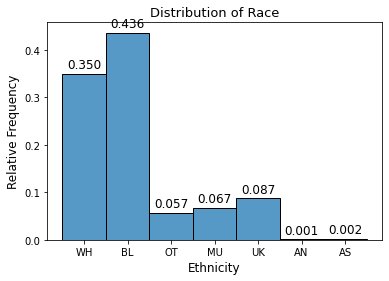

In [30]:
ethnicPlot = sns.histplot(df['ethnic'], stat = "probability")

ethnicPlot.set_xlabel("Ethnicity", size = 12, color = "black")
ethnicPlot.set_ylabel("Relative Frequency", size = 12, color = "black");
ethnicPlot.set_title("Distribution of Race", size = 13, loc = 'center', color = "black");

for p in ethnicPlot.patches:
    ethnicPlot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size = 12, color = "black",
                   textcoords = 'offset points')

plt.show()

### Contingency Table

Here is the contigency table that summarizes the frequency of `gender` and `ethnicity`. As the table depicts, an child, on average, is more likely to be African American male than any other race or gender.

In [31]:
contTable = pd.crosstab(df.gender,df.ethnic).apply(lambda r:round(r/r.sum() * 100, 2),axis=1)

contTable

ethnic,AN,AS,BL,MU,OT,UK,WH
gender,,,,,,,
F,0.07,0.00,42.58,6.16,5.52,9.32,36.34
M,0.07,0.41,44.64,7.15,5.91,8.18,33.63


## Problem Statement and Modeling Building

The dataframe also had several other variables that we could potentially explore, but for this assignment, I am interested in the `reenter` variable - whether a child has a subsequent spell or not.

Ideally, we would not any children to go through any subsequent spell, but when they do, the DHS bear an enormous cost, such as reallocation and logistical. The "cost" is further exacerbated by the emotional labor and mental distress that children themselves have to go through. As a result, <span class="mark">a good solution will be to build a predictive model  that could serve as an early-warning measure to help us understand whether a children will go through a subsequent spell or not.</span> In other words, based on our historical records and what we know about the children, could we build foresee whether s/he will have to go through subsequent spell?

<span class="mark">With the predictive model, we could flag children and take preemptive interventions, such as counseling, to ensure that they do not have to go through the subsequent spell.</span>

Following are the features (characteristics) that could help us discern the patterns among children who (or do not) go through the subsequent spells.

In [32]:
columns = ['gender', 'hispanic', 'ethnic', 'spellage', 'inyear', 'spell',
           'spellone', 'type', 'place1', 'nplaces', 'moves', 'runs',
           'reenter', 'durat']

df_final = df[columns]

### Feature Engineering

Before we could build any predictive models, we need to vectorize categorical variables using one hot encoding. Following are the categorical variables we have in the dataframe.

In [33]:
catVars = ['gender', 'hispanic', 'ethnic', 'type','place1']

df_final_cat = df_final[catVars]

df_final_cat.head()

,gender,hispanic,ethnic,type,place1
0,F,U,WH,SG,PSG
1,M,U,BL,KC,PKC
2,M,N,WH,KC,PKC
3,M,N,BL,FC,PFC
4,F,N,BL,KC,PKC


In [34]:
enc = OHE(handle_unknown='ignore') # import one hot encoding
enc.fit(df_final_cat) # fit the one hot vector on our dataframe
dataDict = enc.categories_ # data dictionary to trace all the encoded features

In [35]:
df_final_cat_ohm = pd.DataFrame(enc.transform(df_final_cat).toarray()) # converting the OHE features to a dataframe

In [36]:
df_final_upd = pd.concat([df_final, df_final_cat_ohm], axis = 1)
df_final_upd = df_final_upd.drop(catVars,axis = 1) # dropping categorical variables because they have
                                                    # already been vectorized

After the categorical variables have been one-hot encoded, following is the snapshot of what the updated dataframe looks like.

In [37]:
print("Dataframe's shape:", df_final_upd.shape)

df_final_upd.head()

Dataframe's shape: (2849, 42)


,spellage,inyear,spell,spellone,nplaces,moves,runs,reenter,durat,0,...,23,24,25,26,27,28,29,30,31,32
0,17,2014,1,1,1,0,0,0,117,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,2014,1,1,1,0,0,0,60,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,2014,1,1,1,0,0,1,53,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,2014,1,1,1,0,0,0,939,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2014,1,1,1,0,0,0,939,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


As we can notice above, the columns such as `31` and `32` add no meaning to what the variable might be about; thus, I appended the variable names for clarity. Here is the snapshot of the dataframe after I added the variable names.

In [38]:
varNames = ['spellage', 'inyear', 'spell', 'spellone','nplaces','moves','runs','reenter','durat',
 'female','male','hispanic_no','hispanic_unknown',
 'hispanic_male','native_american','asian','black',
 'multi_race','other_race','unknown','white','type_AL','type_FC',
 'type_GH','type_IL','type_KC','type_MX','type_RC','type_RT','type_SF','type_SG',
 'type_UK', 'PAL', 'PFC', 'PGH', 'PIL', 'PKC', 'PRC', 'PRT', 'PSF', 'PSG', 'PUK']

df_final_upd.columns = varNames
df_final_upd.head()

,spellage,inyear,spell,spellone,nplaces,moves,runs,reenter,durat,female,...,PAL,PFC,PGH,PIL,PKC,PRC,PRT,PSF,PSG,PUK
0,17,2014,1,1,1,0,0,0,117,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,2014,1,1,1,0,0,0,60,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,2014,1,1,1,0,0,1,53,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,2014,1,1,1,0,0,0,939,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2014,1,1,1,0,0,0,939,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Now, we could split the dataframe into `features` and `label`. Before we could build any predictive model, we must normalize the feature space because many features are in different scales. When we model a regression, for example, it tries to minimize the error (variance) between our prediction and actuality. <span class="mark">However, a unit increase in `spellage` (age) is not the same as a unit increase in `durat` (duration of stay). Thus, `spellage` will naturally have a higher variance than does `durat`.</span> As a result, normalization accounts for the differences in variances as it scales all the features to have mean 0 and the standard deviation of 1.

Here (code hidden), I have normalized the dataframe.

In [39]:
dfX = df_final_upd.loc[:, df_final_upd.columns != 'reenter'] # features

dfY = df_final_upd['reenter'] # labels

Xstd = pd.DataFrame(StandardScaler().fit_transform(dfX))

varNames = ['spellage', 'inyear', 'spell', 'spellone','nplaces','moves','runs','durat',
 'female','male','hispanic_no','hispanic_unknown',
 'hispanic_male','native_american','asian','black',
 'multi_race','other_race','unknown','white','type_AL','type_FC',
 'type_GH','type_IL','type_KC','type_MX','type_RC','type_RT','type_SF','type_SG',
 'type_UK', 'PAL', 'PFC', 'PGH', 'PIL', 'PKC', 'PRC', 'PRT', 'PSF', 'PSG', 'PUK']

Xstd.columns = varNames

## Predictive Modeling

All that remains now is build different predictive models and see their corresponding performance. Unfortunately, I ran out of alloted 2-3 hours of time, so I was unable to build any models. That said, modeling, as in any machine learning project, requires the least amount of time. On the flip side, data wrangling and feature engineering take the most time as evident in this data challenge.

If given additional time, I would love to build an ensemble of classifiers, such as Logistic Regression, Random Forest, Support Vector Machine, and Naive Bayes, and draw their ROC curve to determine their performances. Once the models are built, we can deploy the model and leverage it to predict the subsequent spell for any incoming children and take preventive measures accordingly.

In [ ]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, Xstd, dfY, cv=5)